In [1]:
import pandas as pd

In [2]:
exam=pd.read_csv('exam.csv')

In [3]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


## 3. Advanced Merging and Concatenating

### 3-1. Filtering joins

##### semi join
- left table을 right table과 일치하는 값으로 필터링
- inner join과 비슷하지만 left table의 열만 표시되고, 중복행이 반환되지 않는 것이 차이점

In [4]:
exam1=exam[['id', 'nclass']].query("nclass==1 or nclass==2")    # 1-2반 출석부
exam2=exam[['id', 'math', 'english']]   # 전교생의 math와 english 성적표

In [5]:
exam2=exam2.drop([1,6,11], axis=0)     # 수학/영어 성적표에서 2, 7, 12번 학생 삭제

In [6]:
exam1

,id,nclass
0,1,1
1,2,1
2,3,1
3,4,1
4,5,2
5,6,2
6,7,2
7,8,2


In [7]:
exam2

,id,math,english
0,1,50,98
2,3,45,86
3,4,30,98
4,5,25,80
5,6,50,89
7,8,90,78
8,9,20,98
9,10,50,98
10,11,65,65
12,13,46,98


In [8]:
# step 1: inner join
exam_semi=exam1.merge(exam2, on='id')
exam_semi

,id,nclass,math,english
0,1,1,50,98
1,3,1,45,86
2,4,1,30,98
3,5,2,25,80
4,6,2,50,89
5,8,2,90,78


In [9]:
# step 2
exam1['id'].isin(exam_semi['id'])

0     True
1    False
2     True
3     True
4     True
5     True
6    False
7     True
Name: id, dtype: bool

In [10]:
# step 3
exam_semi_final=exam1[exam1['id'].isin(exam_semi['id'])]
exam_semi_final

,id,nclass
0,1,1
2,3,1
3,4,1
4,5,2
5,6,2
7,8,2


#### anti join
- right table에 일치하는 값이 없는 left table의 값 필터링
- left table의 열만 표시됨

In [11]:
# step 1
exam_anti=exam1.merge(exam2, on='id', how='left', indicator=True)
exam_anti

,id,nclass,math,english,_merge
0,1,1,50.0,98.0,both
1,2,1,NaN,NaN,left_only
2,3,1,45.0,86.0,both
3,4,1,30.0,98.0,both
4,5,2,25.0,80.0,both
5,6,2,50.0,89.0,both
6,7,2,NaN,NaN,left_only
7,8,2,90.0,78.0,both


In [12]:
# step 2
exam_anti_list=exam_anti.loc[exam_anti['_merge']=='left_only', 'id']
exam_anti_list

1    2
6    7
Name: id, dtype: int64

In [13]:
exam_anti_final=exam1[exam1['id'].isin(exam_anti_list)]
exam_anti_final

,id,nclass
1,2,1
6,7,2


### 3-2 Concatenate DataFrames together vertically

##### concat
- 데이터 수직 병합

In [14]:
exam1=exam.query('nclass==1')
exam2=exam.query('nclass==2')
exam3=exam.query('nclass==3')
exam4=exam.query('nclass==4')
exam5=exam.query('nclass==5')

In [15]:
exam1.shape, exam2.shape, exam3.shape, exam4.shape, exam5.shape

((4, 5), (4, 5), (4, 5), (4, 5), (4, 5))

In [16]:
pd.concat([exam1, exam2])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [17]:
# 1반과 3반 병합: 기존 index 유지됨
pd.concat([exam1, exam3])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [18]:
# 인덱스 reset: ignore_index=True
pd.concat([exam1, exam3], ignore_index=True)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,9,3,20,98,15
5,10,3,50,98,45
6,11,3,65,65,65
7,12,3,45,85,32


In [19]:
# 각 데이터 프레임에 이름 지정: keys
pd.concat([exam1, exam3], ignore_index=False, keys=['1반', '3반'])

id  nclass  math  english  science
1반 0    1       1    50       98       50
   1    2       1    60       97       60
   2    3       1    45       86       78
   3    4       1    30       98       58
3반 8    9       3    20       98       15
   9   10       3    50       98       45
   10  11       3    65       65       65
   11  12       3    45       85       32

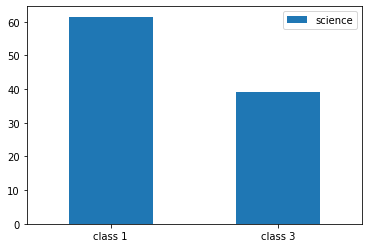

In [20]:
# 1반과 3반의 과학 평균 bar plot으로 비교하기
import matplotlib.pyplot as plt

exam13=pd.concat([exam1, exam3], ignore_index=False, keys=['class 1', 'class 3'])
exam13_1=exam13.groupby(level=0).agg({'science': 'mean'})

exam13_1.plot(kind='bar', rot=0)
plt.show()

In [21]:
# concat의 join은 기본값이 'outer'
exam11=exam.loc[:5, ['id', 'nclass', 'math']]
exam12=exam.loc[5:10, ['id', 'science']]
pd.concat([exam11, exam12], sort=True)    # sort=True: column 이름 순으로 나열

,id,math,nclass,science
0,1,50.0,1.0,NaN
1,2,60.0,1.0,NaN
2,3,45.0,1.0,NaN
3,4,30.0,1.0,NaN
4,5,25.0,2.0,NaN
5,6,50.0,2.0,NaN
5,6,NaN,NaN,98.0
6,7,NaN,NaN,45.0
7,8,NaN,NaN,25.0
8,9,NaN,NaN,15.0


In [22]:
exam11=exam.loc[:5, ['id', 'nclass', 'math']]
exam12=exam.loc[5:10, ['id', 'science']]
pd.concat([exam11, exam12], join='inner')

,id
0,1
1,2
2,3
3,4
4,5
5,6
5,6
6,7
7,8
8,9


In [23]:
# merge: how='inner'
# concat: join='inner'

##### append
- 수직 병합

In [182]:
exam1.append([exam3, exam5], ignore_index=True)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,9,3,20,98,15
5,10,3,50,98,45
6,11,3,65,65,65
7,12,3,45,85,32
8,17,5,65,68,98
9,18,5,80,78,90


### 3-3 Verifying integrity

##### merge(validate= )
- one_to_one or 1:1 : there is no duplicate key
- one_to_many or 1:m: there is a duplicate key in the right table
- many_to_one or m:1: there is a duplicate key in the left table
- many_to_many or m:m: there is a duplicate key in one of the tables.

In [183]:
# 병합할 데이터
exam31=exam.loc[:10, ['id', 'nclass']]
exam32=exam.loc[5:15, ['id', 'math', 'english']]

# 중복 데이터 만들기
exam31.loc[11]=[5, 3]
exam31.loc[12]=[7, 4]

In [184]:
exam31.sort_values('id')   # id number가 5번, 7번인 데이터 중복

,id,nclass
0,1,1
1,2,1
2,3,1
3,4,1
4,5,2
11,5,3
5,6,2
6,7,2
12,7,4
7,8,2


In [185]:
exam32

,id,math,english
5,6,50,89
6,7,80,90
7,8,90,78
8,9,20,98
9,10,50,98
10,11,65,65
11,12,45,85
12,13,46,98
13,14,48,87
14,15,75,56


In [199]:
exam31.merge(exam32, on='id', validate='one_to_one')
# error: Merge keys are not unique in left dataset; not a one-to-one merge

MergeError: Merge keys are not unique in left dataset; not a one-to-one merge

In [187]:
exam31.merge(exam32, on='id', validate='many_to_one')

,id,nclass,math,english
0,6,2,50,89
1,7,2,80,90
2,7,4,80,90
3,8,2,90,78
4,9,3,20,98
5,10,3,50,98
6,11,3,65,65


In [190]:
exam31.merge(exam32, on='id', validate='many_to_many')

,id,nclass,math,english
0,6,2,50,89
1,7,2,80,90
2,7,4,80,90
3,8,2,90,78
4,9,3,20,98
5,10,3,50,98
6,11,3,65,65


In [189]:
# left와 right를 바꿔줌 -> m:1을 1:m으로 바꾸기
exam32.merge(exam31, on='id', validate='one_to_many')

,id,math,english,nclass
0,6,50,89,2
1,7,80,90,2
2,7,80,90,4
3,8,90,78,2
4,9,20,98,3
5,10,50,98,3
6,11,65,65,3


In [31]:
# 중복 제거
exam31=exam31.drop([11,12], axis=0)

In [32]:
# one-to-one
exam31.merge(exam32, on='id', validate='one_to_one')

,id,nclass,math,english
0,6,2,50,89
1,7,2,80,90
2,8,2,90,78
3,9,3,20,98
4,10,3,50,98
5,11,3,65,65


In [33]:
exam31.merge(exam32, on='id', validate='1:1')

,id,nclass,math,english
0,6,2,50,89
1,7,2,80,90
2,8,2,90,78
3,9,3,20,98
4,10,3,50,98
5,11,3,65,65


##### concat(verify_integrity=False)
- 기본값은 False

In [34]:
# 중복되는 데이터 만들기
exam33=exam[:10]
exam34=exam[5:15]

In [35]:
exam33

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [36]:
exam34     # 병합 시 index 5-9 학생이 중복

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
14,15,4,75,56,78


In [200]:
pd.concat([exam33, exam34], verify_integrity=True)
# error: Indexes have overlapping values, Int64Index([5, 6, 7, 8, 9]

ValueError: Indexes have overlapping values: Int64Index([5, 6, 7, 8, 9], dtype='int64')

In [38]:
pd.concat([exam33, exam34], verify_integrity=False)   # 중복되는 데이터 repeat

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


## 4. Merging Ordered and Time-Series Data

### 4-1 Using merge_ordered()
- 정렬하여 병합, 시계열 데이터에 자주 사용

In [191]:
# 시계열 데이터 불러오기
country=pd.read_csv('country_timeseries.csv')

In [192]:
country

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [194]:
country['Date']=pd.to_datetime(country['Date'])

In [195]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [196]:
# merge 데이터 만들기
country1=country[['Date', 'Day', 'Cases_Guinea', 'Deaths_Guinea']]
country2=country[['Date', 'Day', 'Cases_Liberia', 'Deaths_Liberia']]

In [197]:
# merge_ordered를 사용하면 날짜별로 테이블이 정렬됨
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib'))   # outer가 default

,Date,Day_Gui,Cases_Guinea,Deaths_Guinea,Day_Lib,Cases_Liberia,Deaths_Liberia
0,2014-03-22,0,49.0,29.0,0,NaN,NaN
1,2014-03-24,2,86.0,59.0,2,NaN,NaN
2,2014-03-25,3,86.0,60.0,3,NaN,NaN
3,2014-03-26,4,86.0,62.0,4,NaN,NaN
4,2014-03-27,5,103.0,66.0,5,8.0,6.0
...,...,...,...,...,...,...,...
117,2014-12-31,284,2730.0,1739.0,284,8115.0,3471.0
118,2015-01-02,286,NaN,NaN,286,8157.0,3496.0
119,2015-01-03,287,2769.0,1767.0,287,8166.0,3496.0
120,2015-01-04,288,2775.0,1781.0,288,NaN,NaN


##### fill_method: fill missing value

In [201]:
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib')).isna().sum()

Date               0
Day_Gui            0
Cases_Guinea      29
Deaths_Guinea     30
Day_Lib            0
Cases_Liberia     39
Deaths_Liberia    41
dtype: int64

In [202]:
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib'), fill_method='ffill')

,Date,Day_Gui,Cases_Guinea,Deaths_Guinea,Day_Lib,Cases_Liberia,Deaths_Liberia
0,2014-03-22,0,49.0,29.0,0,NaN,NaN
1,2014-03-24,2,86.0,59.0,2,NaN,NaN
2,2014-03-25,3,86.0,60.0,3,NaN,NaN
3,2014-03-26,4,86.0,62.0,4,NaN,NaN
4,2014-03-27,5,103.0,66.0,5,8.0,6.0
...,...,...,...,...,...,...,...
117,2014-12-31,284,2730.0,1739.0,284,8115.0,3471.0
118,2015-01-02,286,NaN,NaN,286,8157.0,3496.0
119,2015-01-03,287,2769.0,1767.0,287,8166.0,3496.0
120,2015-01-04,288,2775.0,1781.0,288,NaN,NaN


In [203]:
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib'), fill_method='ffill').isna().sum()

Date               0
Day_Gui            0
Cases_Guinea      29
Deaths_Guinea     30
Day_Lib            0
Cases_Liberia     39
Deaths_Liberia    41
dtype: int64

In [49]:
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib')).ffill()

,Date,Day_Gui,Cases_Guinea,Deaths_Guinea,Day_Lib,Cases_Liberia,Deaths_Liberia
0,2014-03-22,0,49.0,29.0,0,NaN,NaN
1,2014-03-24,2,86.0,59.0,2,NaN,NaN
2,2014-03-25,3,86.0,60.0,3,NaN,NaN
3,2014-03-26,4,86.0,62.0,4,NaN,NaN
4,2014-03-27,5,103.0,66.0,5,8.0,6.0
...,...,...,...,...,...,...,...
117,2014-12-31,284,2730.0,1739.0,284,8115.0,3471.0
118,2015-01-02,286,2730.0,1739.0,286,8157.0,3496.0
119,2015-01-03,287,2769.0,1767.0,287,8166.0,3496.0
120,2015-01-04,288,2775.0,1781.0,288,8166.0,3496.0


In [51]:
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib')).ffill().isna().sum()

Date              0
Day_Gui           0
Cases_Guinea      0
Deaths_Guinea     0
Day_Lib           0
Cases_Liberia     4
Deaths_Liberia    4
dtype: int64

In [53]:
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib')).ffill().fillna(0)

,Date,Day_Gui,Cases_Guinea,Deaths_Guinea,Day_Lib,Cases_Liberia,Deaths_Liberia
0,2014-03-22,0,49.0,29.0,0,0.0,0.0
1,2014-03-24,2,86.0,59.0,2,0.0,0.0
2,2014-03-25,3,86.0,60.0,3,0.0,0.0
3,2014-03-26,4,86.0,62.0,4,0.0,0.0
4,2014-03-27,5,103.0,66.0,5,8.0,6.0
...,...,...,...,...,...,...,...
117,2014-12-31,284,2730.0,1739.0,284,8115.0,3471.0
118,2015-01-02,286,2730.0,1739.0,286,8157.0,3496.0
119,2015-01-03,287,2769.0,1767.0,287,8166.0,3496.0
120,2015-01-04,288,2775.0,1781.0,288,8166.0,3496.0


In [54]:
pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib')).ffill().fillna(0).isna().sum()

Date              0
Day_Gui           0
Cases_Guinea      0
Deaths_Guinea     0
Day_Lib           0
Cases_Liberia     0
Deaths_Liberia    0
dtype: int64

                Deaths_Guinea  Deaths_Liberia
Deaths_Guinea        1.000000        0.964793
Deaths_Liberia       0.964793        1.000000


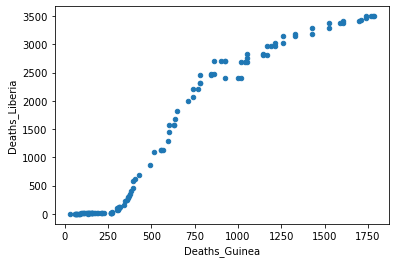

In [101]:
# Guinea와 Liberia의 사망률 상관관계 scatter plot 그리기
country12=pd.merge_ordered(country1, country2, on='Date', suffixes=('_Gui', '_Lib')).ffill().fillna(0)

# 상관계수
print(country12[['Deaths_Guinea', 'Deaths_Liberia']].corr())

# scatter plot
country12.plot(x='Deaths_Guinea', y='Deaths_Liberia', kind='scatter')
plt.show()

### 4-2 Using merge_asof()
- merge_ordered()의 left join과 유사
- 동일한 값이 아닌 가장 가까운 값에 일치하는 것이 차이점
- 날짜 또는 시간이 정확하지 않을 때 사용

In [78]:
country['Cases_Guinea']

0      2776.0
1      2775.0
2      2769.0
3         NaN
4      2730.0
        ...  
117     103.0
118      86.0
119      86.0
120      86.0
121      49.0
Name: Cases_Guinea, Length: 122, dtype: float64

In [91]:
# 데이터 만들기
country3=country.loc[[1,5,11], ['Date', 'Day','Cases_Guinea']].sort_values('Date')
country4=country.loc[[1,2,6,13], ['Date', 'Day', 'Deaths_Guinea']].sort_values('Date')

In [92]:
country3

,Date,Day,Cases_Guinea
11,2014-12-14,267,2416.0
5,2014-12-28,281,2706.0
1,2015-01-04,288,2775.0


In [93]:
country4

,Date,Day,Deaths_Guinea
13,2014-12-07,260,1428.0
6,2014-12-27,280,1697.0
2,2015-01-03,287,1767.0
1,2015-01-04,288,1781.0


In [96]:
pd.merge_asof(country3, country4, on='Date', suffixes=('_case', '_death'))   # direction의 기본값은 backward

,Date,Day_case,Cases_Guinea,Day_death,Deaths_Guinea
0,2014-12-14,267,2416.0,260,1428.0
1,2014-12-28,281,2706.0,280,1697.0
2,2015-01-04,288,2775.0,288,1781.0


In [97]:
# direction=forward
pd.merge_asof(country3, country4, on='Date', suffixes=('_case', '_death'), direction='forward')

,Date,Day_case,Cases_Guinea,Day_death,Deaths_Guinea
0,2014-12-14,267,2416.0,280,1697.0
1,2014-12-28,281,2706.0,287,1767.0
2,2015-01-04,288,2775.0,288,1781.0


In [102]:
# direction=nearest
pd.merge_asof(country3, country4, on='Date', suffixes=('_case', '_death'), direction='nearest')

,Date,Day_case,Cases_Guinea,Day_death,Deaths_Guinea
0,2014-12-14,267,2416.0,260,1428.0
1,2014-12-28,281,2706.0,280,1697.0
2,2015-01-04,288,2775.0,288,1781.0


### 4-3. Selecting data with .query()

In [108]:
# 숫자 데이터
exam.query('math>70')

,id,nclass,math,english,science
6,7,2,80,90,45
7,8,2,90,78,25
14,15,4,75,56,78
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [113]:
exam.query('math>70 or science<50')

,id,nclass,math,english,science
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32
13,14,4,48,87,12
14,15,4,75,56,78
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [117]:
exam.query('math==80')

,id,nclass,math,english,science
6,7,2,80,90,45
17,18,5,80,78,90


In [120]:
# 문자 데이터
mpg=pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [121]:
mpg.query("manufacturer=='audi'")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [122]:
mpg.query("manufacturer=='audi' or manufacturer=='volkswagen'")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [125]:
mpg.query("manufacturer=='volkswagen' and model=='passat'")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [124]:
mpg.query("manufacturer=='audi' or (manufacturer=='volkswagen' and model=='passat')")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [128]:
mpg.query("(manufacturer=='audi' and cty>17) or (manufacturer=='volkswagen' and hwy>27)")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
207,volkswagen,gti,2.0,1999,4,manual(m5),f,21,29,r,compact


### 4-4. Reshaping data with .melt()
- wide 데이터를 long 데이터로 바꾸기

In [142]:
mpg1=mpg.loc[:19,['manufacturer', 'model', 'displ', 'cty']]

In [143]:
mpg2=mpg1.melt(id_vars=['manufacturer', 'model'])

In [144]:
mpg2

,manufacturer,model,variable,value
0,audi,a4,displ,1.8
1,audi,a4,displ,1.8
2,audi,a4,displ,2.0
3,audi,a4,displ,2.0
4,audi,a4,displ,2.8
5,audi,a4,displ,2.8
6,audi,a4,displ,3.1
7,audi,a4 quattro,displ,1.8
8,audi,a4 quattro,displ,1.8
9,audi,a4 quattro,displ,2.0


In [153]:
mpg1.melt(id_vars=['manufacturer', 'model'], value_vars=['displ'])

,manufacturer,model,variable,value
0,audi,a4,displ,1.8
1,audi,a4,displ,1.8
2,audi,a4,displ,2.0
3,audi,a4,displ,2.0
4,audi,a4,displ,2.8
5,audi,a4,displ,2.8
6,audi,a4,displ,3.1
7,audi,a4 quattro,displ,1.8
8,audi,a4 quattro,displ,1.8
9,audi,a4 quattro,displ,2.0


In [157]:
mpg1.melt(id_vars=['manufacturer', 'model'], value_vars=['displ'], var_name=['displacement'])

,manufacturer,model,displacement,value
0,audi,a4,displ,1.8
1,audi,a4,displ,1.8
2,audi,a4,displ,2.0
3,audi,a4,displ,2.0
4,audi,a4,displ,2.8
5,audi,a4,displ,2.8
6,audi,a4,displ,3.1
7,audi,a4 quattro,displ,1.8
8,audi,a4 quattro,displ,1.8
9,audi,a4 quattro,displ,2.0


In [159]:
mpg1.melt(id_vars=['manufacturer', 'model'], value_vars=['displ'], value_name='litres')

,manufacturer,model,variable,litres
0,audi,a4,displ,1.8
1,audi,a4,displ,1.8
2,audi,a4,displ,2.0
3,audi,a4,displ,2.0
4,audi,a4,displ,2.8
5,audi,a4,displ,2.8
6,audi,a4,displ,3.1
7,audi,a4 quattro,displ,1.8
8,audi,a4 quattro,displ,1.8
9,audi,a4 quattro,displ,2.0


In [ ]:
# unpivot everything except A column: A를 id_vars로 해라